In [17]:
#setup
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import os.path as os
import requests

In [18]:

#Change root to the folder where you have the data stored, AR has the group project
root = r"G:/.shortcut-targets-by-id/1hgVHDpl_iZ7es6sKW0QRlC9X6SF58wk7/Machine Learning 4 Cities Final Project"
#Change this to match your folder structure
inp= os.join(root, "/Results")


In [19]:
from pydrive.auth import GoogleAuth

gauth = GoogleAuth()
gauth.LocalWebserverAuth() # Creates local webserver and auto handles authentication.

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=570719947456-53haph7mjc317oel1ujh0kmjbfd499jf.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [20]:
# files in clean data google drive
from pydrive.drive import GoogleDrive
drive = GoogleDrive(gauth)
fileList = drive.ListFile({'q': "'1jxSI_nq32-W9kPHKvQkzuNGJ5aIBD2j2' in parents and trashed=false"}).GetList()
for file in fileList:
  print('Title: %s, ID: %s' % (file['title'], file['id']))
  # Get the folder ID that you want
  if(file['title'] == "To Share"):
      fileID = file['id']

Title: analysis_box.csv, ID: 1Vzjvta98IG9Hg4SfAGcd8JD8FaF3IXwy
Title: analysis_bbl.csv, ID: 1yYX-ROr1c7fzcQiG6NZ1sh7Ko5gqr_4G
Title: analysis_bbl_noacs.csv, ID: 1h-tDpBSslfzqzsJe1ny_ujDnr68RKry3
Title: borobox_convex_hull.geojson, ID: 1SzBNj3Ba-v9MEwuCkZT9e9iAwVYUqx8r


In [21]:
#read geojson file
borobox = drive.CreateFile({'id': '1SzBNj3Ba-v9MEwuCkZT9e9iAwVYUqx8r'})
borobox.GetContentFile('borobox_convex_hull.geojson')  

borobox= gpd.read_file('borobox_convex_hull.geojson')

borobox

,borobox,geometry
0,B0020,"POLYGON ((996589.357 203761.038, 996453.584 20..."
1,B0023,"POLYGON ((995490.702 207449.105, 995167.181 20..."
2,B0024,"POLYGON ((995718.069 206877.230, 995626.619 20..."
3,B0025,"POLYGON ((995642.617 206803.105, 995091.457 20..."
4,B0027,"POLYGON ((995808.521 206099.291, 995459.101 20..."
...,...,...
10859,X4978,"POLYGON ((1009067.178 263280.356, 1008851.782 ..."
10860,X4981,"POLYGON ((1011004.582 262701.718, 1010818.235 ..."
10861,X4982,"POLYGON ((1010997.445 264005.246, 1010998.507 ..."
10862,X4985,"POLYGON ((1011128.410 267860.427, 1010710.689 ..."


<AxesSubplot:>

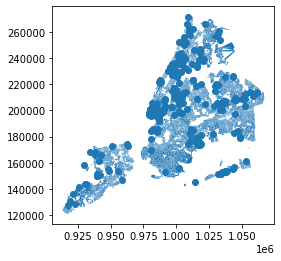

In [22]:
borobox.plot()

In [23]:
pr_prob = pd.read_csv("G:/.shortcut-targets-by-id/1hgVHDpl_iZ7es6sKW0QRlC9X6SF58wk7/Machine Learning 4 Cities Final Project/Data/data_for_viz/pred_box.csv").drop(["Unnamed: 0"], axis = 1)

In [24]:
pr_prob

,borobox,prediction_dt,num_fire_ev,prediction_rf
0,B0020,23.844992,6,22.006666
1,B0023,23.844992,3,18.551734
2,B0024,23.844992,25,31.420857
3,B0025,23.844992,5,17.792724
4,B0027,61.203901,44,42.183885
...,...,...,...,...
10859,X4978,23.844992,33,24.186655
10860,X4981,32.115274,12,23.461117
10861,X4982,11.222251,3,8.806100
10862,X4985,23.844992,3,11.331769


In [27]:
pr_prob_nb = pd.read_csv("G:/.shortcut-targets-by-id/1hgVHDpl_iZ7es6sKW0QRlC9X6SF58wk7/Machine Learning 4 Cities Final Project/Data/data_for_viz/pred_prob_naivebayes_box.csv").drop(["Unnamed: 0"], axis = 1)

In [28]:
pr_prob_nb

,borobox,prob_fireev_nb
0,B0020,0.002745
1,B0023,0.002619
2,B0024,0.005272
3,B0025,0.001620
4,B0027,0.641603
...,...,...
10859,X4978,0.002087
10860,X4981,0.001059
10861,X4982,0.000175
10862,X4985,0.000189


In [29]:
pr_prob_merge = pd.merge(pr_prob_nb, pr_prob, on="borobox")

In [30]:
pr_prob_merge

,borobox,prob_fireev_nb,prediction_dt,num_fire_ev,prediction_rf
0,B0020,0.002745,23.844992,6,22.006666
1,B0023,0.002619,23.844992,3,18.551734
2,B0024,0.005272,23.844992,25,31.420857
3,B0025,0.001620,23.844992,5,17.792724
4,B0027,0.641603,61.203901,44,42.183885
...,...,...,...,...,...
10859,X4978,0.002087,23.844992,33,24.186655
10860,X4981,0.001059,32.115274,12,23.461117
10861,X4982,0.000175,11.222251,3,8.806100
10862,X4985,0.000189,23.844992,3,11.331769


In [31]:
pr_prob_borobox = pd.merge(pr_prob_merge, borobox, how='inner', on='borobox')

<AxesSubplot:>

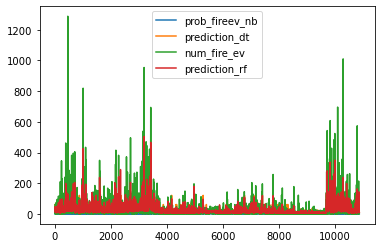

In [32]:
pr_prob_borobox.plot()

In [33]:
pr_prob_borobox = gpd.GeoDataFrame(pr_prob_borobox, geometry='geometry')

In [34]:
pr_prob_borobox

,borobox,prob_fireev_nb,prediction_dt,num_fire_ev,prediction_rf,geometry
0,B0020,0.002745,23.844992,6,22.006666,"POLYGON ((996589.357 203761.038, 996453.584 20..."
1,B0023,0.002619,23.844992,3,18.551734,"POLYGON ((995490.702 207449.105, 995167.181 20..."
2,B0024,0.005272,23.844992,25,31.420857,"POLYGON ((995718.069 206877.230, 995626.619 20..."
3,B0025,0.001620,23.844992,5,17.792724,"POLYGON ((995642.617 206803.105, 995091.457 20..."
4,B0027,0.641603,61.203901,44,42.183885,"POLYGON ((995808.521 206099.291, 995459.101 20..."
...,...,...,...,...,...,...
10859,X4978,0.002087,23.844992,33,24.186655,"POLYGON ((1009067.178 263280.356, 1008851.782 ..."
10860,X4981,0.001059,32.115274,12,23.461117,"POLYGON ((1011004.582 262701.718, 1010818.235 ..."
10861,X4982,0.000175,11.222251,3,8.806100,"POLYGON ((1010997.445 264005.246, 1010998.507 ..."
10862,X4985,0.000189,23.844992,3,11.331769,"POLYGON ((1011128.410 267860.427, 1010710.689 ..."


<AxesSubplot:>

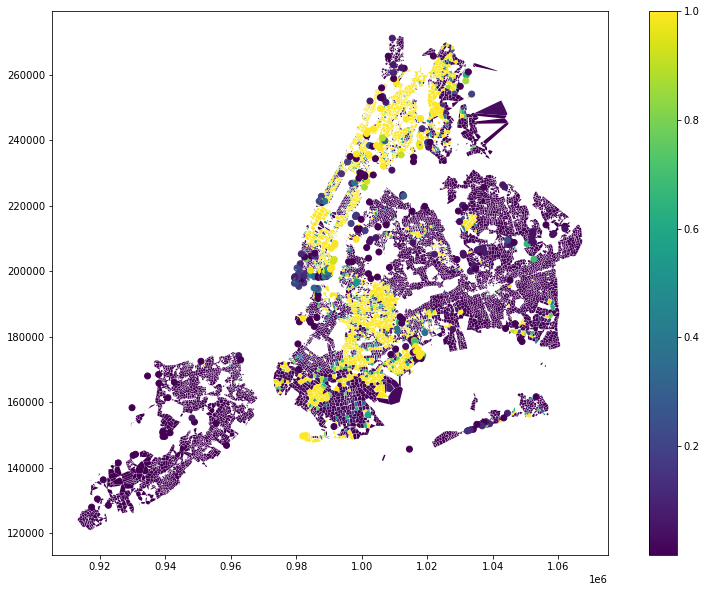

In [44]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_borobox.plot(column='prob_fireev_nb', ax=ax, legend=True)

<AxesSubplot:>

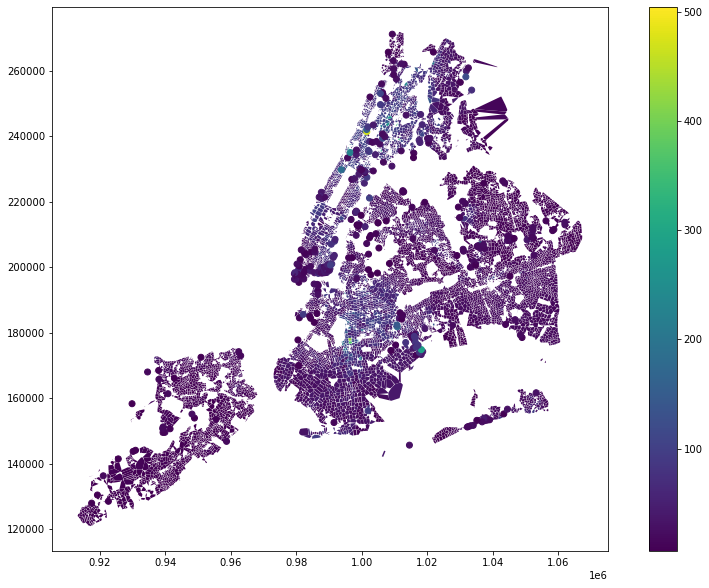

In [37]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_borobox.plot(column='prediction_rf', ax=ax, legend=True)

<AxesSubplot:>

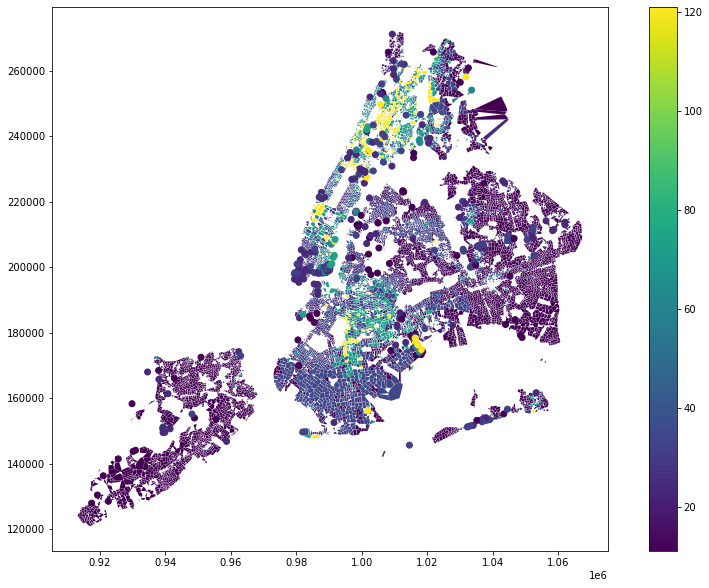

In [38]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_borobox.plot(column='prediction_dt', ax=ax, legend=True)

<AxesSubplot:>

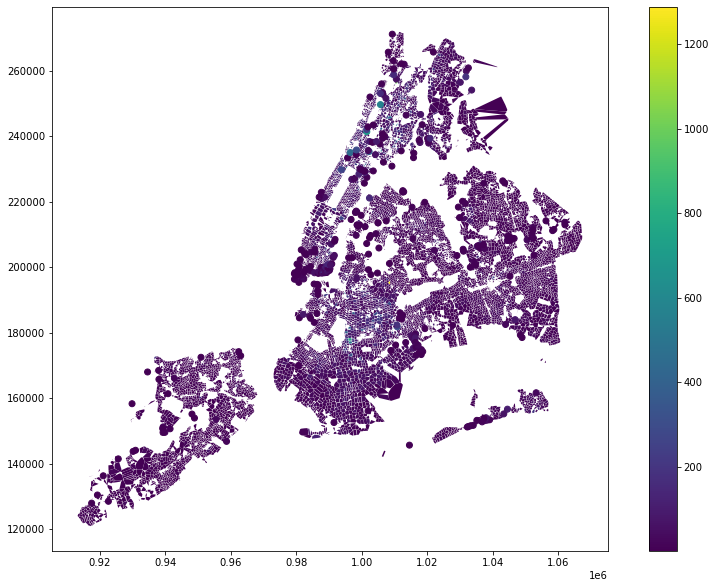

In [39]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_borobox.plot(column='num_fire_ev', ax=ax, legend=True)

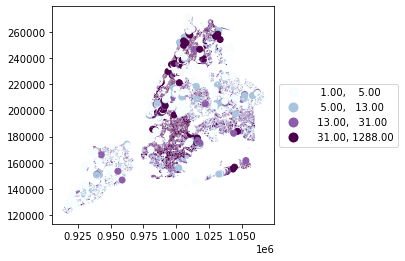

In [47]:
%matplotlib inline
ax = pr_prob_borobox.plot(column='num_fire_ev', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})